## 1 - Packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 2 - Overview of the Problem set

**Problem Statement**: You are given the iris dataset which consists of 3 different types of irises that are Setosa, Versicolour, and Virginica. The petal and sepal length and width are stored in a 150x4 numpy array.
Thus, The dataset contains 150 iris sample where each sample has four features that are the petal and sepal length and width.

We will build a tree decision classifier that can correctly classify irises as Setosa, Versicolour, or Virginica.

Let's get more familiar with the dataset.

In [2]:
# Loading iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# Explore the dataset
print("Name   of the features: ", iris.feature_names)
print("Name   of the target  : ", iris.target_names)
print("Shape  of the dataset : ", iris.data.shape)
print("Number of the samples : ", iris.data.shape[0])
print("Number of the features: ", iris.data.shape[1])
print("Number of the targets : ", iris.target.shape)

Name   of the features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Name   of the target  :  ['setosa' 'versicolor' 'virginica']
Shape  of the dataset :  (150, 4)
Number of the samples :  150
Number of the features:  4
Number of the targets :  (150,)


In [4]:
# Display a portion of the dataset
target_col_name = 'target'
df = pd.DataFrame(data= np.hstack([iris.data, iris.target[:, np.newaxis]]),
                       columns= iris.feature_names + [target_col_name])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Note: You should reshape iris target shape from (150,) to (150,1) to treat it as column vector.

## 3 - Splitting Data into Training and Test Sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[iris.feature_names], df[target_col_name], train_size=0.6, random_state=0)

print(f"Number of training examples: X_train = {X_train.shape[0]}")
print(f"Number of testing examples: X_test = {X_test.shape[0]}")
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

Number of training examples: X_train = 90
Number of testing examples: X_test = 60
X_train shape: (90, 4)
Y_train shape: (90,)
X_test shape: (60, 4)
Y_test shape: (60,)


## 4 - Building Model


In [6]:
# Create a classifer
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [7]:
# Train the classifer
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## 5 - Measuring Model Performance

In [8]:
# Predict unseen irises
clf.predict(X_test)

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 2., 1., 0., 1.,
       2., 1., 0., 2., 1., 1., 2., 0., 2., 0., 0., 1., 2., 2., 1., 2., 1.,
       2., 1., 1., 1., 2., 1., 1., 1., 2.])

In [11]:
# Actual unseen irises
Y_test.values

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0., 2., 1., 0., 2.,
       2., 1., 0., 1., 1., 1., 2., 0., 2., 0., 0., 1., 2., 2., 2., 2., 1.,
       2., 1., 1., 2., 2., 2., 2., 1., 2.])

In [12]:
train_accuracy = clf.score(X_train, Y_train)
test_accuracy = clf.score(X_test, Y_test)
print('Train Accuracy: ', train_accuracy)
print('Test Accuracy: ', test_accuracy)

Train Accuracy:  0.9777777777777777
Test Accuracy:  0.8666666666666667


## 6 - Displaying Decision Tree

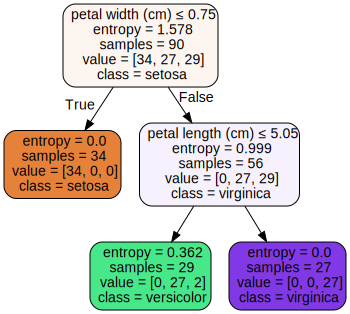

In [13]:
from sklearn.tree import export_graphviz
import graphviz

def display_tree():
    dot_data = export_graphviz(clf, out_file=None, 
                    feature_names=iris.feature_names,class_names=iris.target_names,
                    filled=True, rounded=True, special_characters=True)
    display(graphviz.Source(dot_data))

display_tree()

## 7 - Feature Importance

In [16]:
importances = pd.DataFrame({'Feature':iris.feature_names,'Importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)
importances

,Feature,Importance
3,petal width (cm),0.654
2,petal length (cm),0.346
0,sepal length (cm),0.000
1,sepal width (cm),0.000


<i>As we note the petal length and width have the highest features importance weights. </i>
**Keep in mind that if a feature has a low feature importance value, it doesn’t necessarily mean that the feature isn’t important for prediction, it just means that the particular feature wasn’t chosen at a particularly early level of the tree. It could also be that the feature identical or highly correlated with another informative feature.**

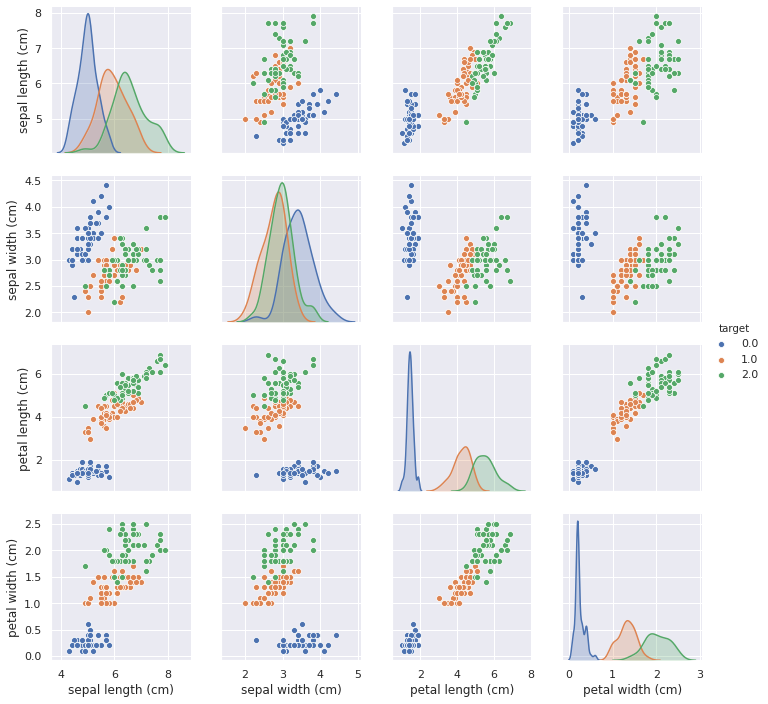

In [17]:
# Visualize the dataset
import seaborn as sns
sns.set()
sns.pairplot(df, hue=(target_col_name), vars=iris.feature_names)

## 6 - Tuning Model hyperparameters

One way to improve the performance of our model is by finding the optimal value for max_depth hyperparameter. The code below outputs the accuracy for decision trees with different values for max_depth.

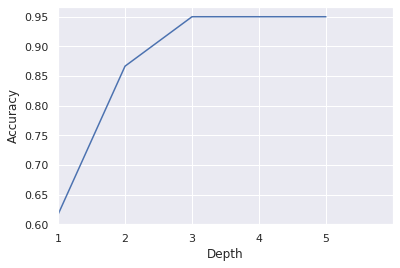

In [18]:
max_depth = 6
accuracy = []
depth_list = [i for i in range(1, max_depth)]
for depth in depth_list:    
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    clf.fit(X_train, Y_train)   
    score = clf.score(X_test, Y_test)
    accuracy.append(score)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.xlim((1, max_depth))
plt.xticks(depth_list)
plt.plot(depth_list, accuracy)

Train Accuracy:  0.9888888888888889
Test Accuracy:  0.95


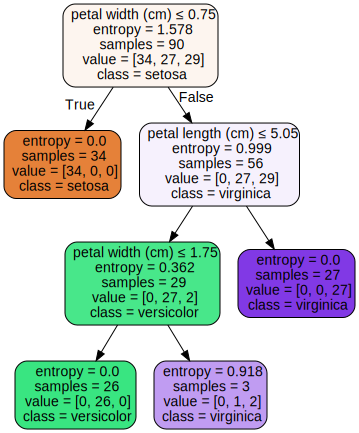

In [19]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf.fit(X_train, Y_train) 
accuracy = clf.score(X_test, Y_test)
train_accuracy = clf.score(X_train, Y_train)
test_accuracy = clf.score(X_test, Y_test)
print('Train Accuracy: ', train_accuracy)
print('Test Accuracy: ', test_accuracy)
display_tree()

## 8 - Model Decision Boundary 

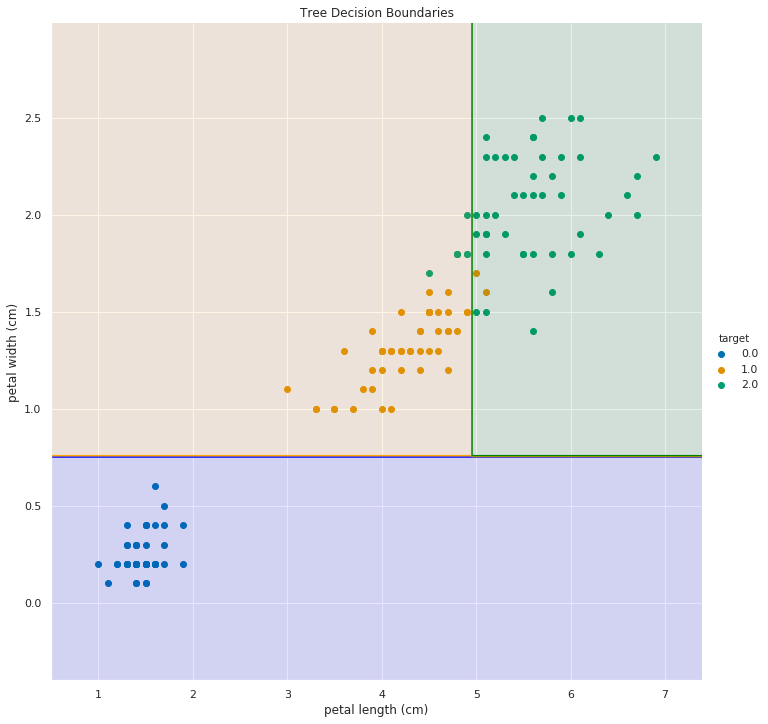

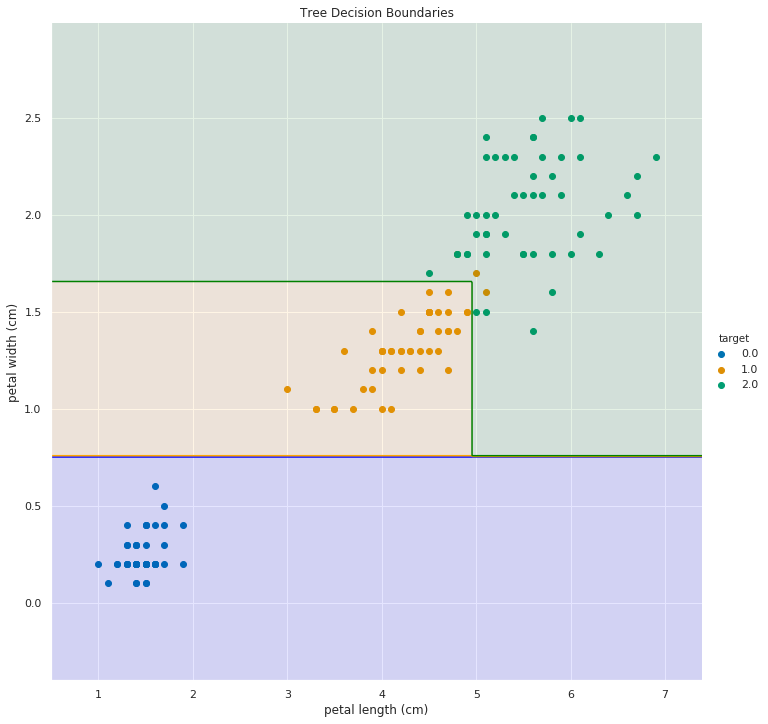

In [20]:
def plot_decision_boundary(model, df):
    
    # Set min and max values and give it some padding
    xx_min, xx_max  = df[iris.feature_names[-2]].min()-0.5, df[iris.feature_names[-2]].max()+0.5
    yy_min, yy_max = df[iris.feature_names[-1]].min()-0.5, df[iris.feature_names[-1]].max()+0.5   
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(xx_min, xx_max, h), np.arange(yy_min, yy_max, h))
    # Computing the predicted class function for each value on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel(), yy.ravel()])
    # Reshaping the predicted class into the meshgrid shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    sel_columns = df.columns[-3:]
    data = df.loc[:, sel_columns]
    grid = sns.FacetGrid(data, hue=sel_columns[-1], height=10, palette='colorblind'
                        ).map(plt.scatter,iris.feature_names[-2],iris.feature_names[-1]).add_legend()
    my_ax = grid.ax
    # Plot the filled and boundary contours
    my_ax.contourf(xx, yy, Z, 2, alpha = 0.1, colors = ('blue','orange','green'))
    my_ax.contour(xx, yy, Z, 2, alpha = 1, colors = ('blue','orange','green'))
    # Add axis labels and title
    my_ax.set_xlabel(iris.feature_names[-2])
    my_ax.set_ylabel(iris.feature_names[-1])
    my_ax.set_title('Tree Decision Boundaries')
    # Show graph
    plt.show()
    
def model(X, Y, depth):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.7, random_state=0)
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    clf.fit(X_train, Y_train) 
    return clf


clf_2 = model(df[iris.feature_names], df[target_col_name], depth=2)
plot_decision_boundary(clf_2, df)

clf_3 = model(df[iris.feature_names], df[target_col_name], depth=3)
plot_decision_boundary(clf_3, df)

## 7 - Suggested Models

We will see how tree depth and splitting dataset into train and test sets could effect model performance!

###  Model A 

Train Accuracy: 0.9666666666666667
Test Accuracy: 0.95


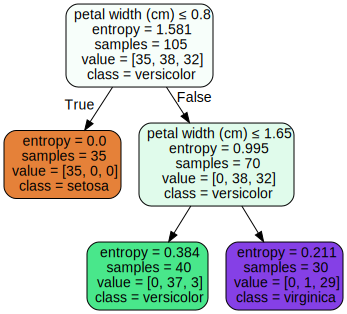

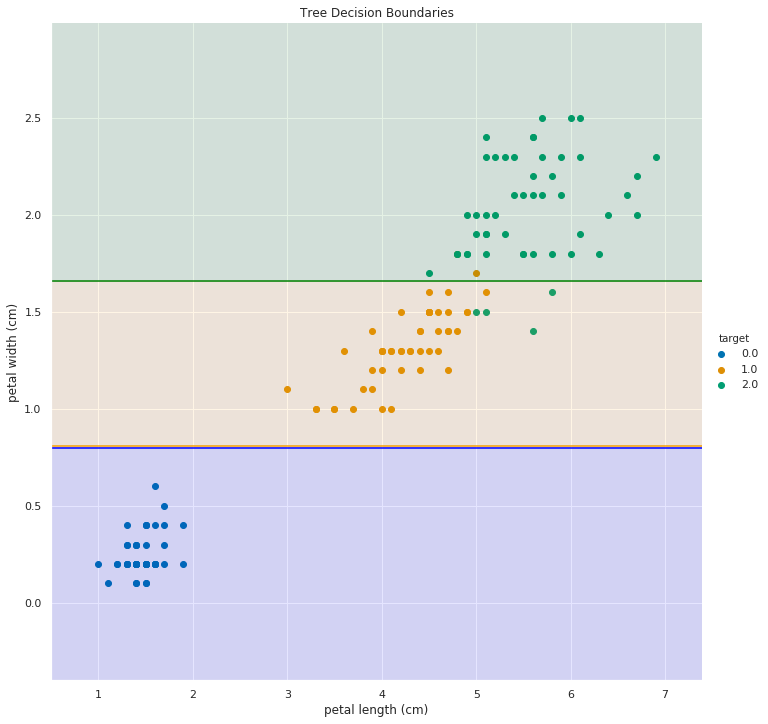

In [21]:
def model(X, Y, depth, seed_split):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.7, random_state=seed_split)
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    clf.fit(X_train, Y_train) 
    return clf

clf = model(df[iris.feature_names], df[target_col_name], depth=2, seed_split=24)
train_accuracy = clf.score(X_train, Y_train)
test_accuracy = clf.score(X_test, Y_test)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
display_tree()
plot_decision_boundary(clf, df)

### Model B

Train Accuracy: 0.9777777777777777
Test Accuracy: 0.9333333333333333


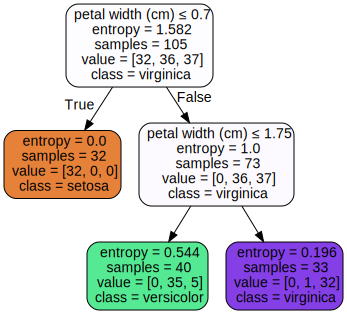

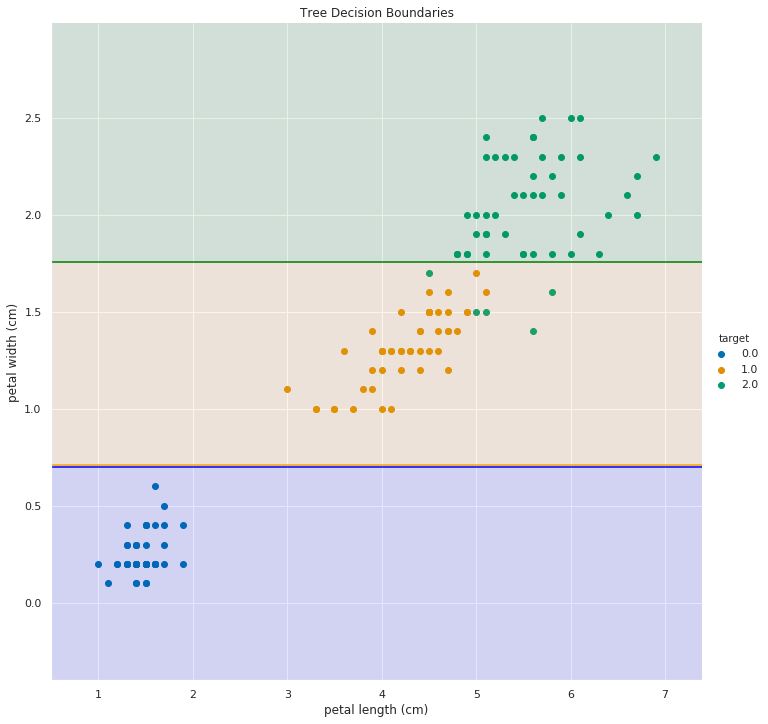

In [22]:
clf = model(df[iris.feature_names], df[target_col_name], depth=2, seed_split=9)
train_accuracy = clf.score(X_train, Y_train)
test_accuracy = clf.score(X_test, Y_test)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
display_tree()
plot_decision_boundary(clf, df)

### Model C

Train Accuracy: 0.9777777777777777
Test Accuracy: 0.95


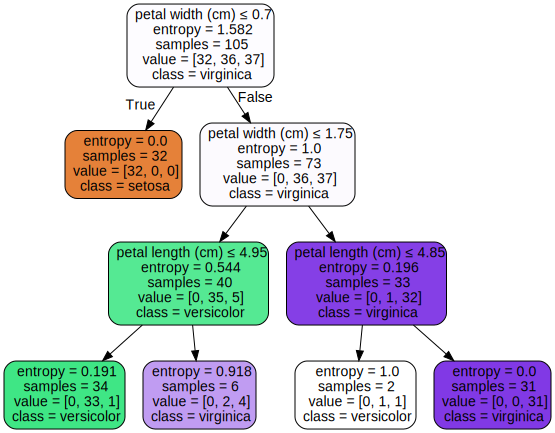

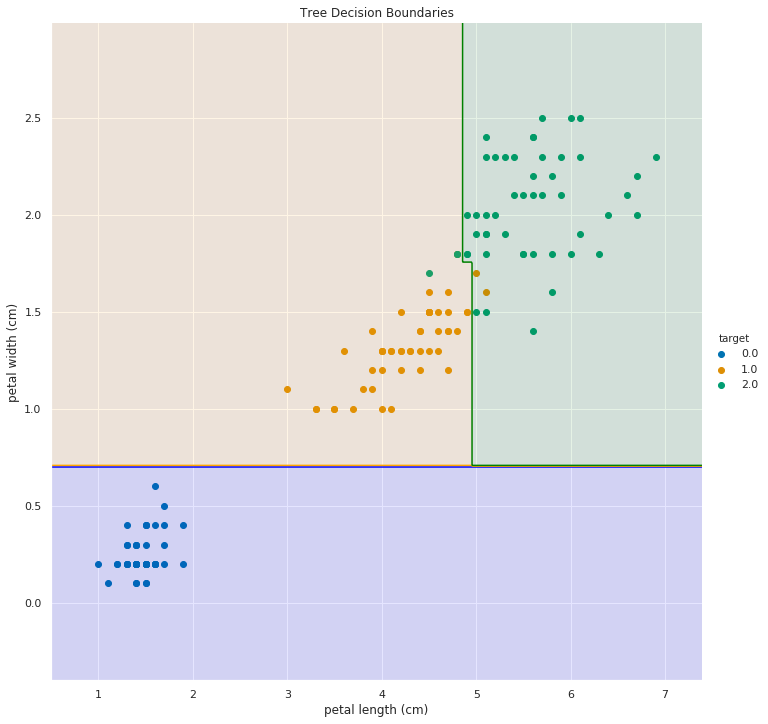

In [23]:
clf = model(df[iris.feature_names], df[target_col_name], depth=3, seed_split=9)
train_accuracy = clf.score(X_train, Y_train)
test_accuracy = clf.score(X_test, Y_test)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
display_tree()
plot_decision_boundary(clf, df)

### Model D

Train Accuracy: 0.9777777777777777
Test Accuracy: 1.0


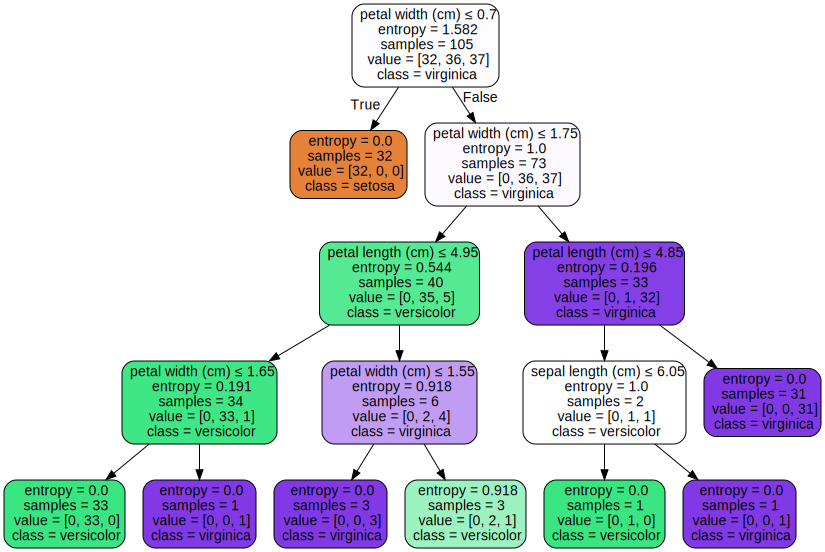

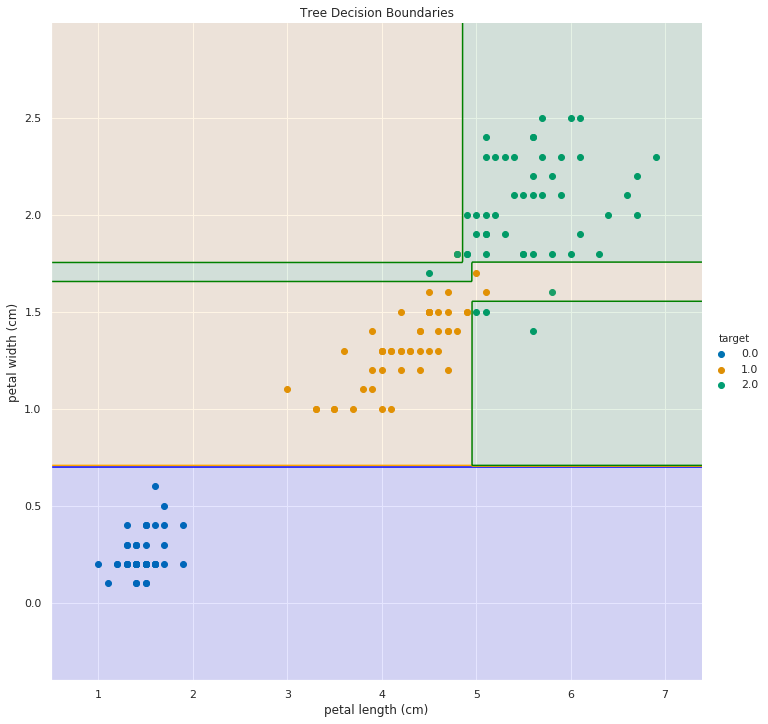

In [24]:
clf = model(df[iris.feature_names], df[target_col_name], depth=4, seed_split=9)
train_accuracy = clf.score(X_train, Y_train)
test_accuracy = clf.score(X_test, Y_test)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
display_tree()
plot_decision_boundary(clf, df)

### Model E

Train Accuracy: 1.0
Test Accuracy: 1.0


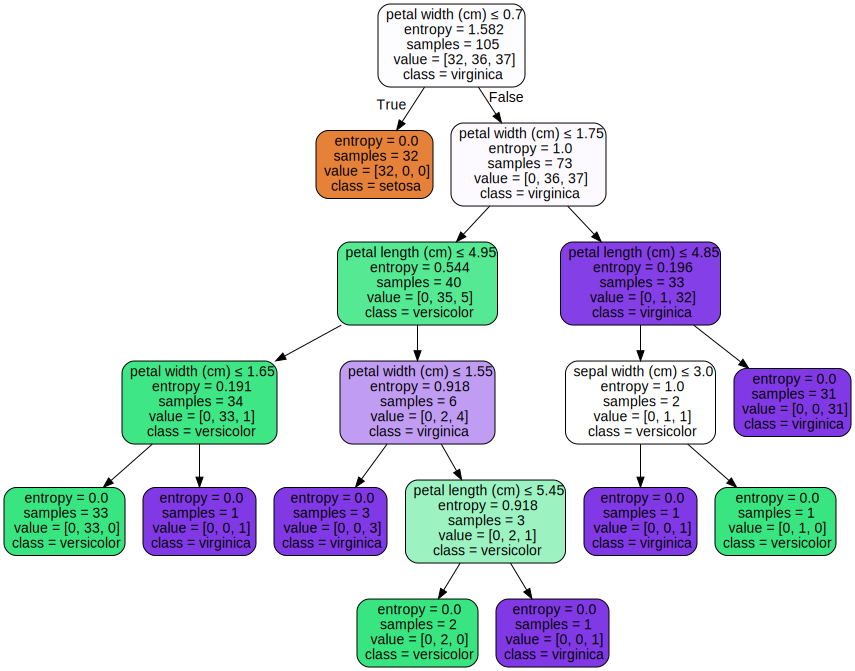

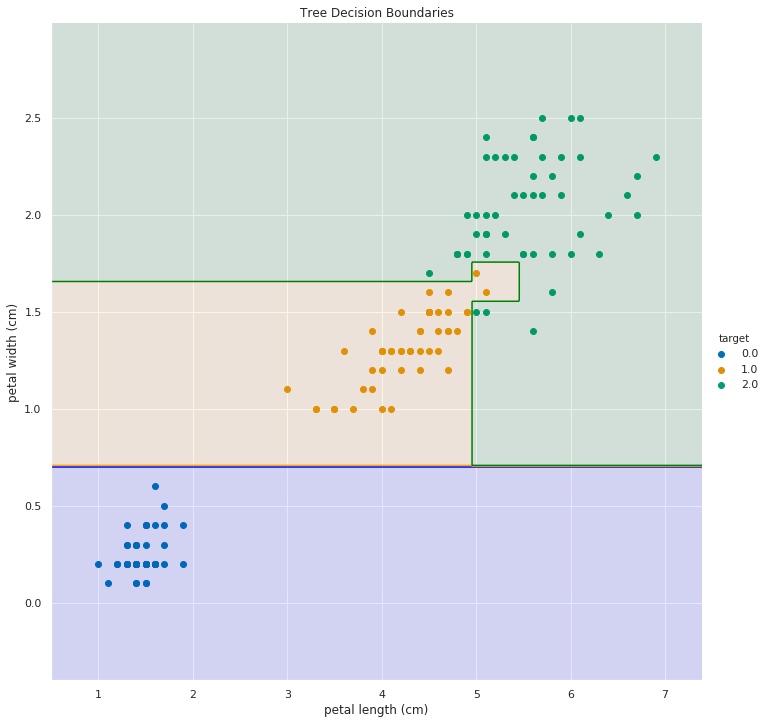

In [25]:
clf = model(df[iris.feature_names], df[target_col_name], depth=5, seed_split=9)
train_accuracy = clf.score(X_train, Y_train)
test_accuracy = clf.score(X_test, Y_test)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
display_tree()
plot_decision_boundary(clf, df)